<a href="https://colab.research.google.com/github/utyabia/1-notebook/blob/main/PyTorch_Workflow_Exercise_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Create a straight line dataset using the linear regression formula (weight * X + bias).
Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.
Plot the training and testing data so it becomes visual.
Your output of the below cell should look something like:

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
Of course the numbers in X and y may be different but ideally they're created using the linear regression formula.

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


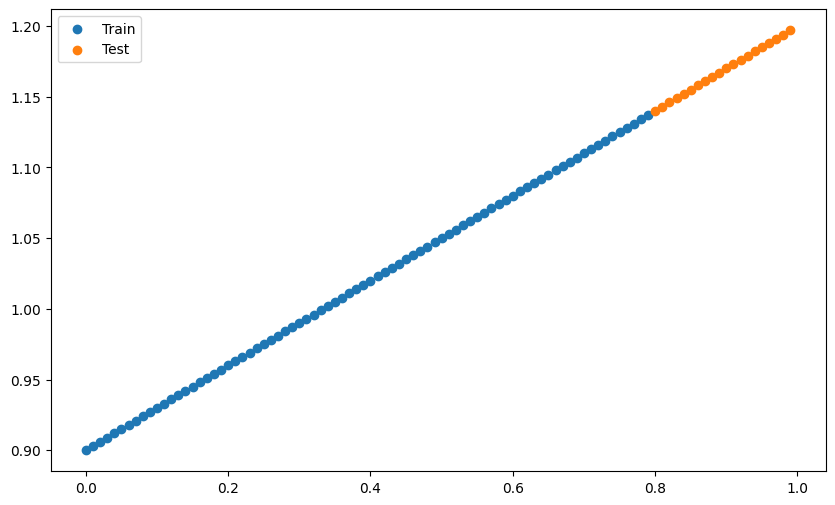

In [2]:
# Create data parameters
weight = 0.3
bias = 0.9

# Create 100 data points between 0 and 1
X = torch.arange(0, 1, 0.01).unsqueeze(1)  # Shape: (100, 1)
y = weight * X + bias  # Shape: (100, 1)

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

# Split into training and test sets
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Test")
plt.legend()
plt.show()


2. Build a PyTorch model by subclassing nn.Module.
Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
Once you've constructed the model, make an instance of it and check its state_dict().
Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

# Instantiate model
model = LinearRegressionModel().to(device)
print(model.state_dict())


OrderedDict([('weight', tensor([1.9166])), ('bias', tensor([1.9893]))])


3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
Write a training loop to perform the appropriate training steps for 300 epochs.
The training loop should test the model on the test dataset every 20 epochs.

In [4]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# Training loop
epochs = 300
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred, y_test)
        print(f"Epoch: {epoch} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")


Epoch: 0 | Train loss: 1.7279 | Test loss: 2.5226
Epoch: 20 | Train loss: 1.4967 | Test loss: 2.2519
Epoch: 40 | Train loss: 1.2655 | Test loss: 1.9812
Epoch: 60 | Train loss: 1.0343 | Test loss: 1.7105
Epoch: 80 | Train loss: 0.8031 | Test loss: 1.4398
Epoch: 100 | Train loss: 0.5719 | Test loss: 1.1691
Epoch: 120 | Train loss: 0.3651 | Test loss: 0.9135
Epoch: 140 | Train loss: 0.2608 | Test loss: 0.7273
Epoch: 160 | Train loss: 0.2145 | Test loss: 0.6013
Epoch: 180 | Train loss: 0.1933 | Test loss: 0.5183
Epoch: 200 | Train loss: 0.1817 | Test loss: 0.4638
Epoch: 220 | Train loss: 0.1734 | Test loss: 0.4266
Epoch: 240 | Train loss: 0.1662 | Test loss: 0.3997
Epoch: 260 | Train loss: 0.1592 | Test loss: 0.3775
Epoch: 280 | Train loss: 0.1523 | Test loss: 0.3594


4. Make predictions with the trained model on the test data.
Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

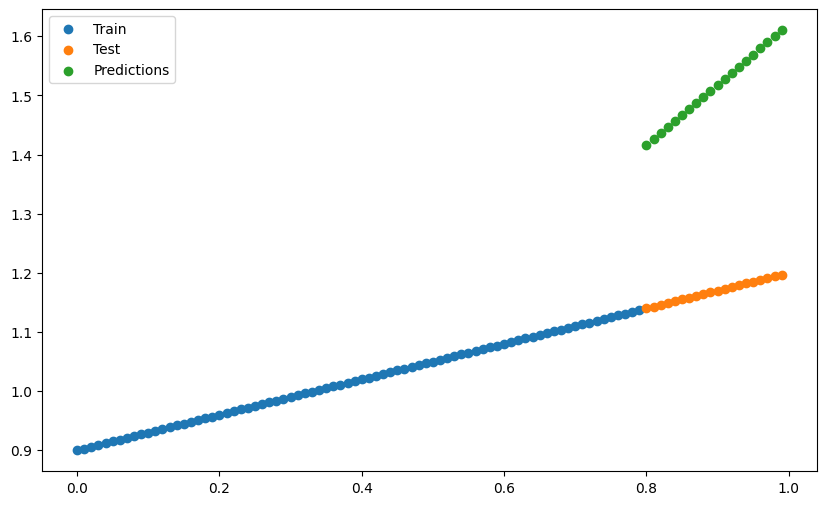

In [5]:
model.eval()
with torch.inference_mode():
    preds = model(X_test)

# Move data to CPU for plotting
X_train, y_train = X_train.cpu(), y_train.cpu()
X_test, y_test = X_test.cpu(), y_test.cpu()
preds = preds.cpu()

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Test")
plt.scatter(X_test, preds, label="Predictions")
plt.legend()
plt.show()


5. Save your trained model's state_dict() to file.
Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [6]:
from pathlib import Path

# Save
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

# Load into new instance
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

# Verify predictions
loaded_model.eval()
with torch.inference_mode():
    loaded_preds = loaded_model(X_test)

print(torch.allclose(preds, loaded_preds.cpu(), atol=1e-2))  # Should be True


True
